In [1]:
!apt-get update -qq
!apt-get install -y fonts-nanum -qq
!pip install konlpy wordcloud matplotlib

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 40.3 MB/s eta 0:00:00


In [2]:
# Download NanumGothic font
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_info(url):
    # 웹 페이지 가져오기
      response = requests.get(url)

      # 응답 받은 데이터를 파싱하기
      soup = BeautifulSoup(response.text, 'html.parser')

      # 뉴스 제목과 내용 가져오기
      news_info = []
      for title, content in zip(soup.find_all(class_='news_tit'), soup.find_all(class_='dsc_txt_wrap')):
          news_info.append([title.get_text().strip(), content.get_text().strip()])

      return news_info

# 기본 URL 설정
base_url = "https://m.search.naver.com/search.naver?sm=mtb_hty.top&where=m_news&ssc=tab.m_news.all&oquery=%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0+%ED%83%9D%EB%B0%B0&tqi=iFnLEdprfMCssvX%2FXndssssss3R-438320&query=%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0+&page={page_num}"

# 뉴스 정보를 저장할 리스트 초기화
all_news_info = []

# 여러 페이지의 뉴스 정보 가져오기
for page_num in range(1, 100):
    url = base_url.format(page_num=page_num)
    news_info = get_news_info(url)
    all_news_info.extend(news_info)

# 가져온 뉴스 정보를 DataFrame으로 변환하기
df = pd.DataFrame(all_news_info, columns=['뉴스 제목', '뉴스 내용'])
print(df)

                                     뉴스 제목  \
0              새벽 시간 무단횡단하던 30대男 화물차 치여 사망   
1         고의교통사고 보험사기 막는다… 경찰청, 5개기관과 업무협약   
2       지난해 전국 교통사고 사망자 수, 역대 최저…11년 연속 감소   
3         "고의 교통사고 다발구간입니다"…7월부터 내비에서 '경고'   
4        [게시판] 에쓰오일, 교통사고 피해 화물차 자녀 장학금 전달   
...                                    ...   
1315       교통사고 내고 도주치상 혐의 기소 30대, 무죄 까닭은?   
1316  폭주족 구경하던 10대들 '날벼락', 인도로 날아온 차량이 덮쳤다   
1317       지인 차 몰래 운전하다 사고…대법 "차주인 책임도 있어"   
1318          어린이 교통사고 빈발에 분양시장 '초품아' 인기 ↑   
1319                  고의교통사고 보험사기 사전예방책 마련   

                                                  뉴스 내용  
0     서울 종로경찰서는 화물차량 운전자인 30대 남성 A씨를 교통사고처리특례법 위반 혐의...  
1     서울경찰청은 26일 치안정책연구소·도로교통공단·손해보험협회·티맵모빌리티·카카오모빌리...  
2     지난해 전국 교통사고 사망자 수가 통계 관리를 시작한 이후 역대 최저를 기록한 것으...  
3     보험금을 노리고 고의로 교통사고를 내는 보험 사기가 갈수록 늘어나고 있죠. 이를 막...  
4     ▲ 에쓰오일(S-OIL)은 26일 화물복지재단에 교통사고 피해 화물차 운전자 자녀를...  
...                                                 ...  
1315  교차로 좌회전 도중 낸 교통사고 현장에서 내뺐다는 혐의로 기소된

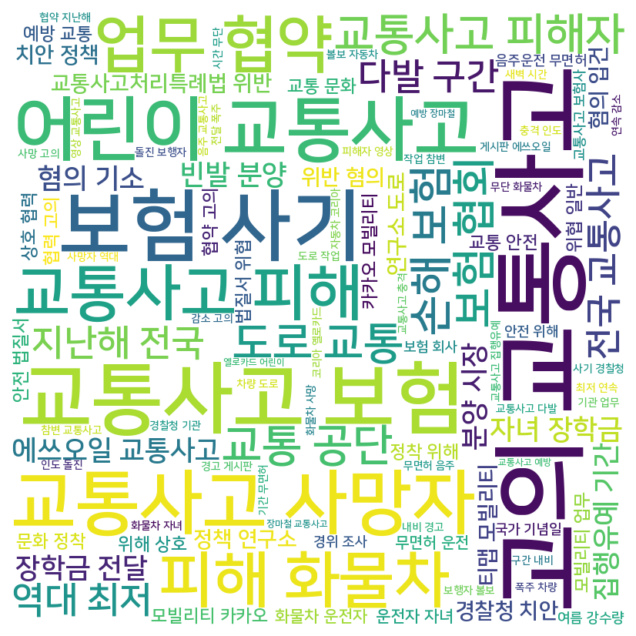

In [6]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instantiate the Okt class
okt = Okt()

# Combine the title and content and use it for analysis
text_combined = ' '.join(df['뉴스 제목']) + ' ' + ' '.join(df['뉴스 내용'])

# Stemming analysis and noun extraction
nouns = okt.nouns(text_combined)

# Extract only nouns with more than one letter
nouns = [word for word in nouns if len(word) > 1]

# Convert the extracted noun list to text by concatenating it with spaces
text = ' '.join(nouns)

# Create word cloud
wordcloud = WordCloud(
    font_path='/content/NanumSquareB.ttf',
    background_color='white',
    width=800,
    height=800,
    max_words=100,
    colormap='viridis'
).generate(text)

# Word cloud output
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install pillow

In [ ]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Instantiate the Okt class
okt = Okt()

# Combine the title and content and use it for analysis
text_combined = ' '.join(df['뉴스 제목']) + ' ' + ' '.join(df['뉴스 내용'])

# Stemming analysis and noun extraction
nouns = okt.nouns(text_combined)

# Extract only nouns with more than one letter
nouns = [word for word in nouns if len(word) > 1]

# Convert the extracted noun list to text by concatenating it with spaces
text = ' '.join(nouns)

# Load a custom shape image
mask = np.array(Image.open("/content/KakaoTalk_20240626_153319766.png"))
# 특정 단어들 및 색상 설정
special_words = {'졸음 운전': 'Navy', '운전 택배':'Navy','화물 차량':'Navy', '택배 차량':'Navy','택배 화물':'Navy','택배 운송업':'Navy','운전 택배':'Navy','운전 대형':'Navy'}

# # Define a custom color function for darker gray and blue shades
# def dark_gray_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "rgb({}, {}, {})".format(
#         np.random.randint(50, 80),  # Darker red for gray
#         np.random.randint(50, 70),  # Darker green for gray
#         np.random.randint(70, 150)  # Blue
#     )
# 색상 변경 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in special_words:
        return special_words[word]
    else:
        return 'gray'

# # Create word cloud
# wordcloud = WordCloud(
#     font_path='/content/NanumBarunGothic.ttf',
#     background_color='white',
#     width=800,
#     height=800,
#     max_words=100,
#     mask=mask,  # Use the loaded image as a mask
#     contour_width=0,  # Optional: add contour width
#     contour_color='steelblue',
#     color_func=dark_gray_blue_color_func  # Apply custom color function
# ).generate(text)
# 워드 클라우드 생성

wordcloud = WordCloud(font_path='/content/NanumSquareB.ttf', width=500, height=500, color_func=color_func,
                      background_color='white', max_words=200, mask=mask).generate(text)

# Word cloud output with masked image colors
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


plt.show()


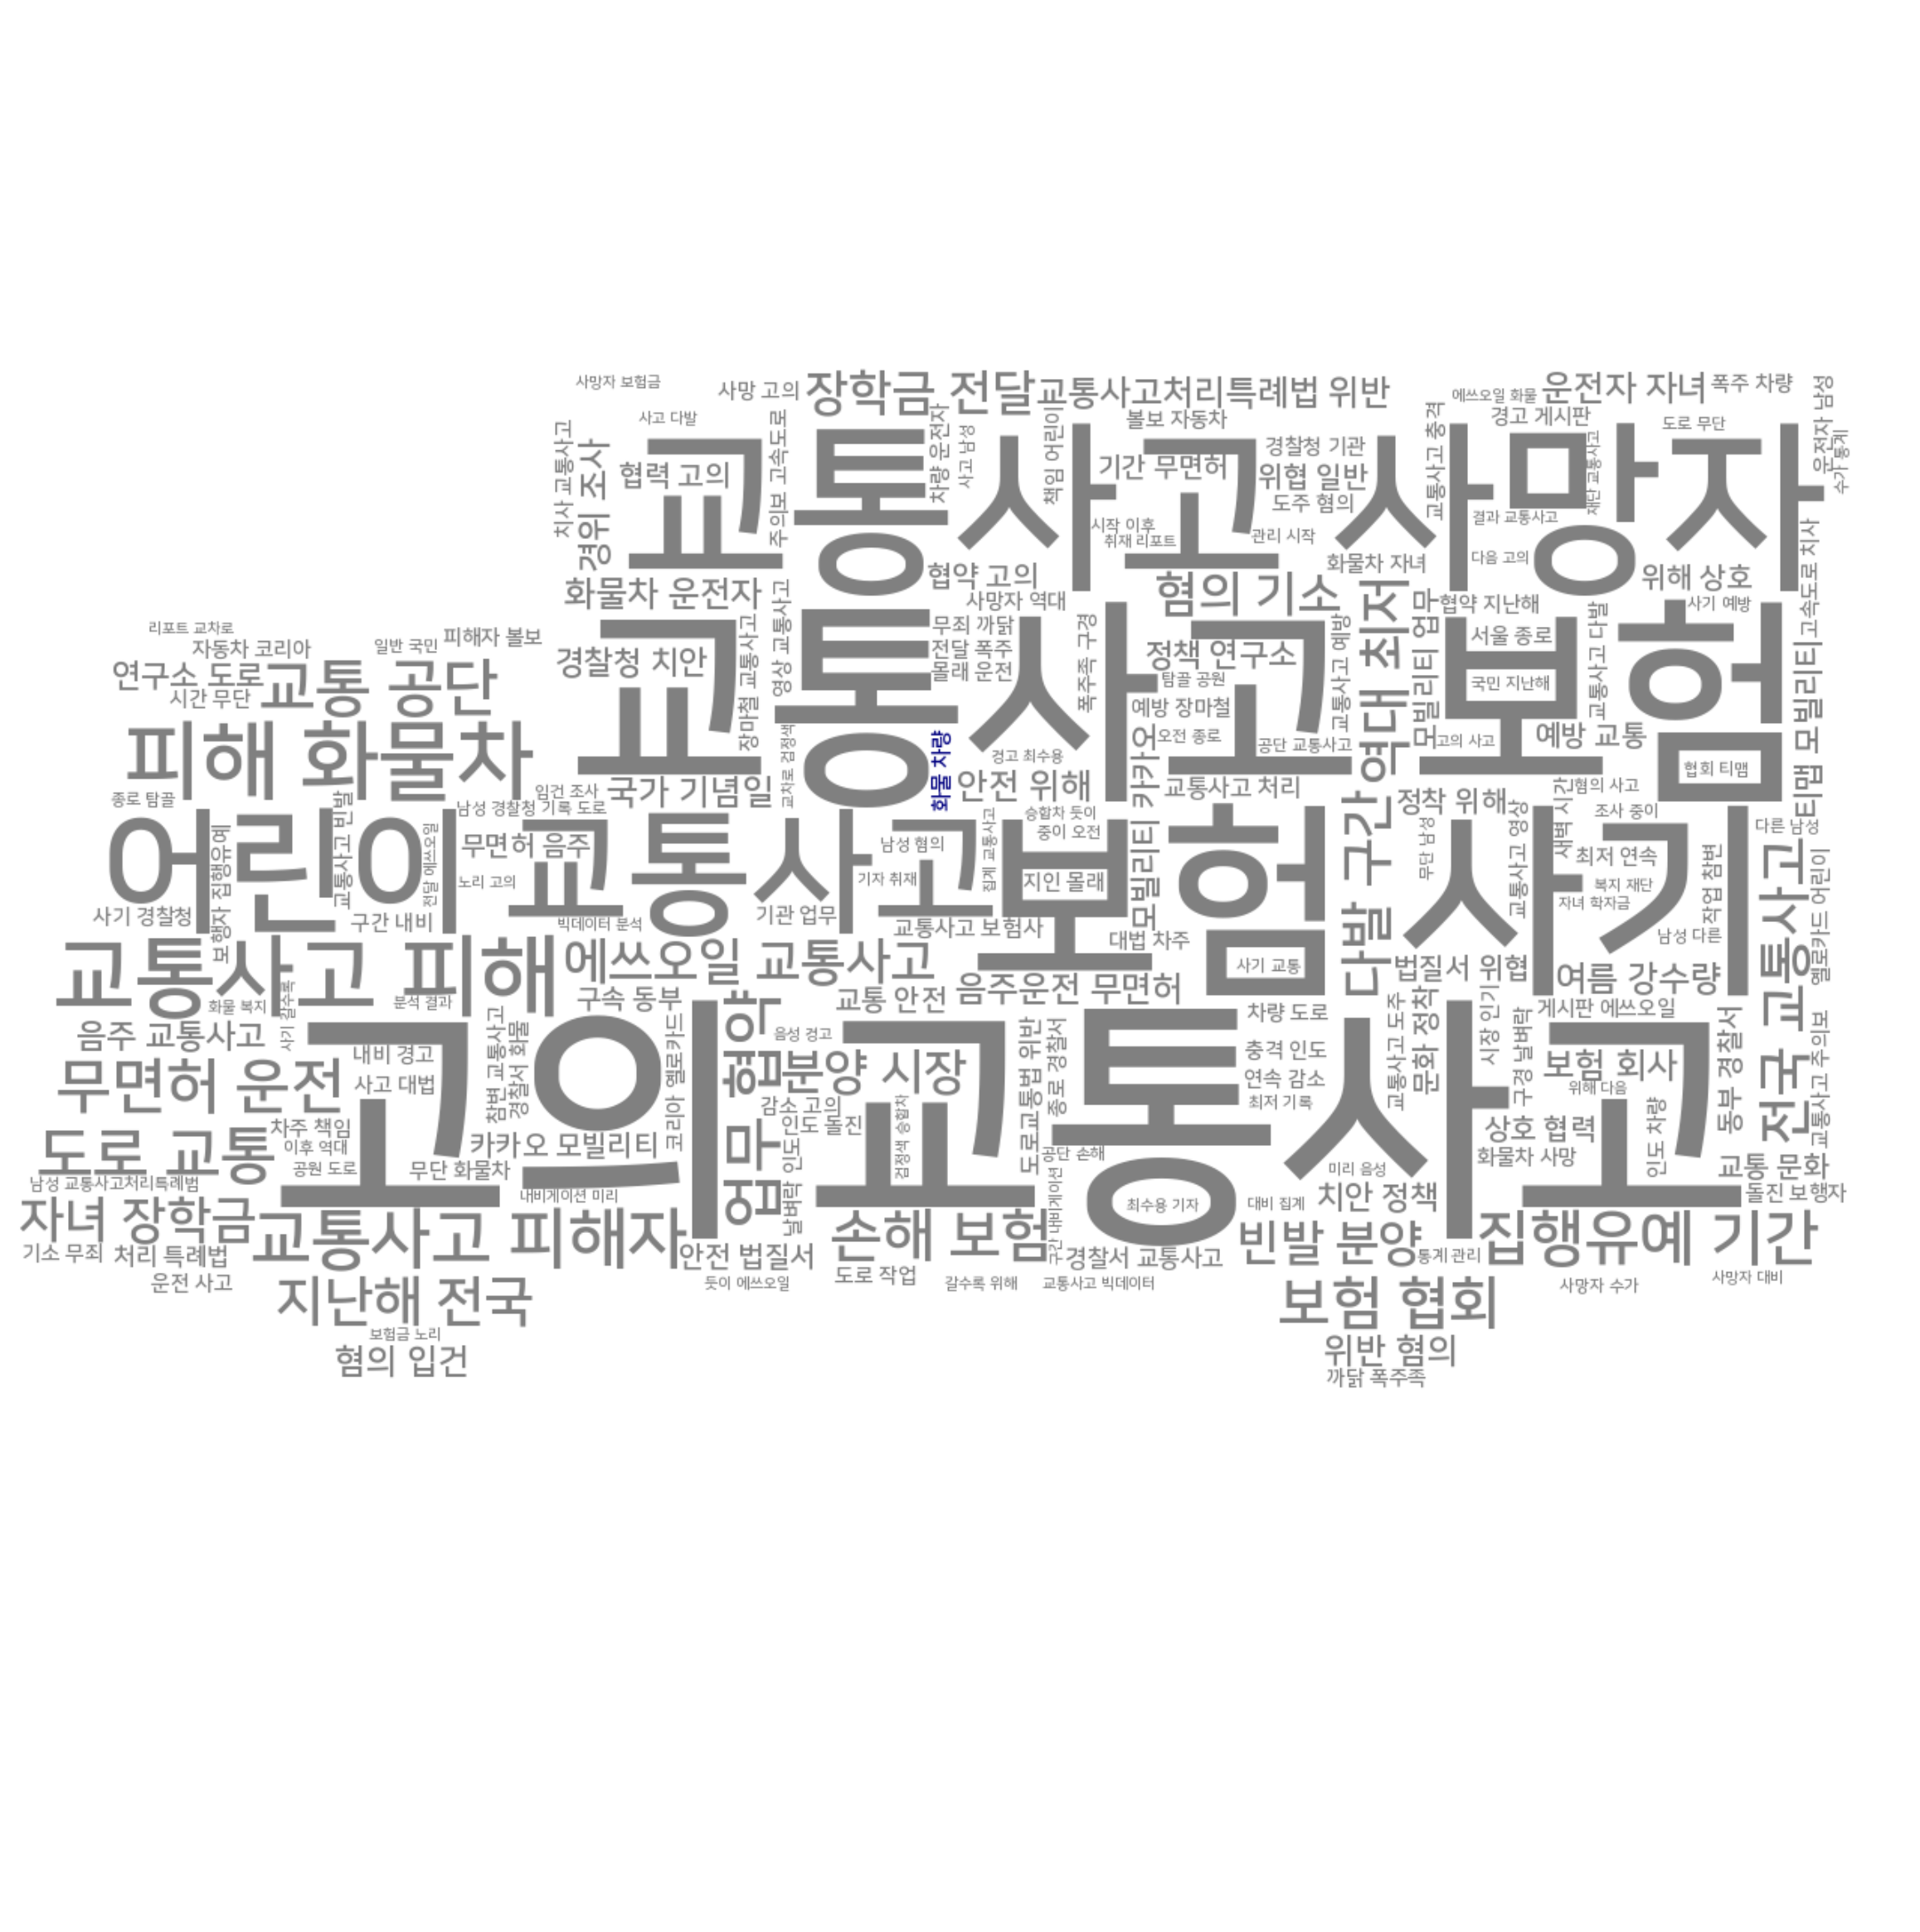

In [5]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Instantiate the Okt class
okt = Okt()

# Combine the title and content and use it for analysis
text_combined = ' '.join(df['뉴스 제목']) + ' ' + ' '.join(df['뉴스 내용'])

# Stemming analysis and noun extraction
nouns = okt.nouns(text_combined)

# Extract only nouns with more than one letter
nouns = [word for word in nouns if len(word) > 1]

# Convert the extracted noun list to text by concatenating it with spaces
text = ' '.join(nouns)

# Load a custom shape image
mask = np.array(Image.open("/content/KakaoTalk_20240626_153319766.png"))
# 특정 단어들 및 색상 설정
special_words = {'졸음 운전': 'Navy', '운전 택배':'Navy','화물 차량':'Navy', '택배 차량':'Navy','택배 화물':'Navy','택배 운송업':'Navy','운전 택배':'Navy','운전 대형':'Navy'}

# # Define a custom color function for darker gray and blue shades
# def dark_gray_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "rgb({}, {}, {})".format(
#         np.random.randint(50, 80),  # Darker red for gray
#         np.random.randint(50, 70),  # Darker green for gray
#         np.random.randint(70, 150)  # Blue
#     )
# 색상 변경 함수 정의
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in special_words:
        return special_words[word]
    else:
        return 'gray'

# # Create word cloud
# wordcloud = WordCloud(
#     font_path='/content/NanumBarunGothic.ttf',
#     background_color='white',
#     width=800,
#     height=800,
#     max_words=100,
#     mask=mask,  # Use the loaded image as a mask
#     contour_width=0,  # Optional: add contour width
#     contour_color='steelblue',
#     color_func=dark_gray_blue_color_func  # Apply custom color function
# ).generate(text)
# 워드 클라우드 생성

wordcloud = WordCloud(font_path='/content/NanumSquareB.ttf', width=500, height=500, color_func=color_func,
                      background_color='white', max_words=200, mask=mask).generate(text)

# Word cloud output with masked image colors
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


plt.show()
